In [2]:
!pip install -U textblob

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tales\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1]:
import pandas as pd
import nltk

from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/games.csv")
df

,reviews,score,likes,time,app_name,year,reviews_en
0,"Olá! Sei que é um app que está em teste, está ...",4,586,13/11/2021,Xbox Game Pass (Beta),2021,"Hello! I know it's an app that's being tested,..."
1,"O app é excelente, a questão é que existem alg...",4,369,19/07/2022,Xbox Game Pass (Beta),2022,"The app is excellent, the issue is that there ..."
2,"Sei que ainda está em beta mas, seria interess...",3,509,23/11/2021,Xbox Game Pass (Beta),2021,"I know it's still in beta, but it would be int..."
3,Ficou top o visual da nova versão. Deveriam un...,5,289,02/07/2020,Xbox Game Pass (Beta),2020,The look of the new version was top. They shou...
4,"O aplicativo é realmente muito bom, é o que to...",5,44,19/10/2021,Xbox Game Pass (Beta),2021,"The app is really good, it's what everyone exp..."
...,...,...,...,...,...,...,...
12231,Drird,5,0,14/05/2020,Steam Link,2020,Drird
12232,Paia,2,0,26/12/2021,Steam Link,2021,paia
12233,Gg,4,0,27/09/2019,Steam Link,2019,gg
12234,Amor,5,0,19/07/2018,Steam Link,2018,Love


In [5]:
def sentences_tokenization(text):
    sentences = []
    blob = TextBlob(text)
    for sentence in blob.sentences:
        sentences.append(str(sentence))

    return sentences

In [21]:
df['sentences_pt'] = df['reviews'].apply(sentences_tokenization)

In [22]:
def sentence_sentiment_analysis(sentence_list):
    sentiments = []
    for corpus in sentence_list:
        blob = TextBlob(corpus)
        sentiment = blob.sentiment.polarity
        sentiments.append(sentiment)

    return sentiments

In [8]:
df['sentences_sentiments'] = df['sentences_en'].apply(sentence_sentiment_analysis)
df['sentences_sentiments'][0]

[0.0, 0.425, 0.7]

In [9]:
def sentiment_classification(sentiments_list):
    classifications = []
    for sentiment in sentiments_list:
        if sentiment > 0:
            classifications.append(1)
        elif sentiment < 0:
            classifications.append(-1)
        else:
            classifications.append(0)

    return classifications

In [10]:
df['classifications'] = df['sentences_sentiments'].apply(sentiment_classification)

In [23]:
df['positive_sentences'] = df.apply(lambda x: [frase for frase, classificacao in zip(x['sentences_pt'], x['classifications']) if classificacao == 1], axis=1)

In [24]:
df['negative_sentences'] = df.apply(lambda x: [frase for frase, classificacao in zip(x['sentences_pt'], x['classifications']) if classificacao == -1], axis=1)

In [25]:
df.head()

,reviews,score,likes,time,app_name,year,reviews_en,sentences_en,classifications,positive_sentences,negative_sentences,sentences_pt
0,"Olá! Sei que é um app que está em teste, está ...",4,586,13/11/2021,Xbox Game Pass (Beta),2021,"Hello! I know it's an app that's being tested,...","[Hello!, I know it's an app that's being teste...","[0, 1, 1]","[Sei que é um app que está em teste, está bom,...",[],"[Olá!, Sei que é um app que está em teste, est..."
1,"O app é excelente, a questão é que existem alg...",4,369,19/07/2022,Xbox Game Pass (Beta),2022,"The app is excellent, the issue is that there ...","[The app is excellent, the issue is that there...","[1, -1, 1]","[O app é excelente, a questão é que existem al...","[Um exemplo é o Gears 5, que no Cloud Gaming d...","[O app é excelente, a questão é que existem al..."
2,"Sei que ainda está em beta mas, seria interess...",3,509,23/11/2021,Xbox Game Pass (Beta),2021,"I know it's still in beta, but it would be int...","[I know it's still in beta, but it would be in...","[1, 0, 1]","[Sei que ainda está em beta mas, seria interes...",[],"[Sei que ainda está em beta mas, seria interes..."
3,Ficou top o visual da nova versão. Deveriam un...,5,289,02/07/2020,Xbox Game Pass (Beta),2020,The look of the new version was top. They shou...,"[The look of the new version was top., They sh...","[1, 0, -1, 0, 1, 1]","[Ficou top o visual da nova versão., Fora isso...","[Está faltando visualizar as notas, opiniões d...","[Ficou top o visual da nova versão., Deveriam ..."
4,"O aplicativo é realmente muito bom, é o que to...",5,44,19/10/2021,Xbox Game Pass (Beta),2021,"The app is really good, it's what everyone exp...","[The app is really good, it's what everyone ex...","[1, 1, 0]","[O aplicativo é realmente muito bom, é o que t...",[],"[O aplicativo é realmente muito bom, é o que t..."


In [14]:
import nltk
from nltk.tokenize import word_tokenize
import string
from textblob import TextBlob, Word
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tales\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tales\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tales\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
positive_text = [str(frase) for frase in df['positive_sentences']]
positive_text = ' '.join(positive_text)

negative_text = [str(frase) for frase in df['negative_sentences']]
negative_text = ' '.join(negative_text)

stopwords = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation

positive_text = positive_text.lower()
negative_text = negative_text.lower()

wp = Word(positive_text)
lemma_pos = TextBlob(positive_text)
" ". join([w.lemmatize() for w in lemma_pos.words])

wn = Word(negative_text)
lemma_neg = TextBlob(negative_text)
" ". join([w.lemmatize() for w in lemma_neg.words])

pos_tokens = word_tokenize(positive_text)
neg_tokens = word_tokenize(negative_text)

pos_tokens = [word for word in pos_tokens if word not in stopwords]
neg_tokens = [word for word in neg_tokens if word not in stopwords]

clean_pos_tokens = []
clean_neg_tokens = []

for token in pos_tokens:
    clean_token = ''.join(char for char in token if char not in punctuation)
    if clean_token:
        clean_pos_tokens.append(clean_token)

for token in neg_tokens:
    clean_token = ''.join(char for char in token if char not in punctuation)
    if clean_token:
        clean_neg_tokens.append(clean_token)

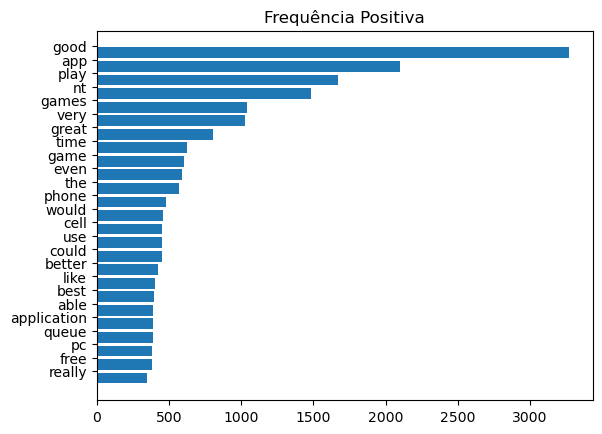

In [16]:
from collections import Counter

pos_freq = dict(Counter(clean_pos_tokens))
pos_freq.pop('s')
pos_popular_words = sorted(pos_freq, key = pos_freq.get, reverse = True)

plt.barh(range(25), [pos_freq[w] for w in reversed(pos_popular_words[0:25])])
plt.yticks([x + 0.5 for x in range(25)], reversed(pos_popular_words[0:25]))
plt.title('Frequência Positiva')
plt.show()

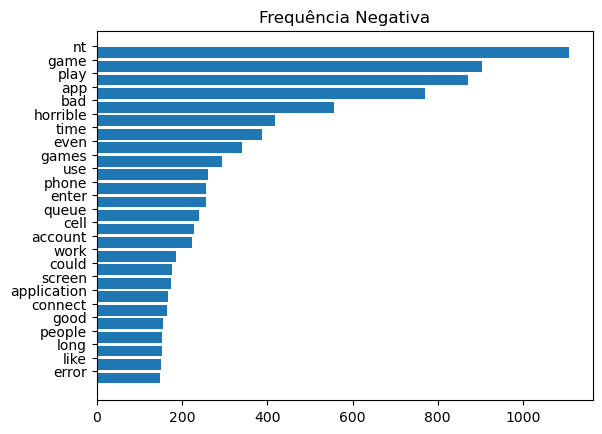

In [17]:
neg_freq = dict(Counter(clean_neg_tokens))
neg_freq.pop('s')
neg_freq.pop('m')
neg_freq.pop('ca')
neg_freq.pop('the')

neg_popular_words = sorted(neg_freq, key = neg_freq.get, reverse = True)

plt.barh(range(25), [neg_freq[w] for w in reversed(neg_popular_words[0:25])])
plt.yticks([x + 0.5 for x in range(25)], reversed(neg_popular_words[0:25]))
plt.title('Frequência Negativa')
plt.show()

In [18]:
len(lemma_pos)

725449

In [26]:
df.to_csv('data/games_sentiment.csv', index=False)

In [20]:
df.drop(['sentences_sentiments'], axis=1, inplace=True)
df

,reviews,score,likes,time,app_name,year,reviews_en,sentences_en,classifications,positive_sentences,negative_sentences
0,"Olá! Sei que é um app que está em teste, está ...",4,586,13/11/2021,Xbox Game Pass (Beta),2021,"Hello! I know it's an app that's being tested,...","[Hello!, I know it's an app that's being teste...","[0, 1, 1]","[I know it's an app that's being tested, it's ...",[]
1,"O app é excelente, a questão é que existem alg...",4,369,19/07/2022,Xbox Game Pass (Beta),2022,"The app is excellent, the issue is that there ...","[The app is excellent, the issue is that there...","[1, -1, 1]","[The app is excellent, the issue is that there...","[An example is Gears 5, which in Cloud Gaming ..."
2,"Sei que ainda está em beta mas, seria interess...",3,509,23/11/2021,Xbox Game Pass (Beta),2021,"I know it's still in beta, but it would be int...","[I know it's still in beta, but it would be in...","[1, 0, 1]","[I know it's still in beta, but it would be in...",[]
3,Ficou top o visual da nova versão. Deveriam un...,5,289,02/07/2020,Xbox Game Pass (Beta),2020,The look of the new version was top. They shou...,"[The look of the new version was top., They sh...","[1, 0, -1, 0, 1, 1]","[The look of the new version was top., Other t...","[It is missing to view the notes, game opinion..."
4,"O aplicativo é realmente muito bom, é o que to...",5,44,19/10/2021,Xbox Game Pass (Beta),2021,"The app is really good, it's what everyone exp...","[The app is really good, it's what everyone ex...","[1, 1, 0]","[The app is really good, it's what everyone ex...",[]
...,...,...,...,...,...,...,...,...,...,...,...
12231,Drird,5,0,14/05/2020,Steam Link,2020,Drird,[Drird],[0],[],[]
12232,Paia,2,0,26/12/2021,Steam Link,2021,paia,[paia],[0],[],[]
12233,Gg,4,0,27/09/2019,Steam Link,2019,gg,[gg],[0],[],[]
12234,Amor,5,0,19/07/2018,Steam Link,2018,Love,[Love],[1],[Love],[]
